# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments


Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

import matplotlib as mpl
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [3]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# first get a standard-scaled version of the dataset -

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data_scaled = data.copy()
data_scaled[data.columns] = scaler.fit_transform(data[data.columns].astype(float))

In [6]:
# and look at different random samples to find interesting records
data_scaled.sample(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
244,-0.458982,0.268413,0.301898,-0.389538,0.054910,0.158021
60,-0.269953,-0.373206,-0.010248,-0.613701,0.254808,-0.461454
239,2.809534,-0.438046,-0.439541,0.447721,-0.431186,0.258486
42,-0.091055,0.238570,0.738460,-0.594729,0.843583,-0.524999
161,0.034331,-0.713005,-0.807837,-0.408305,-0.604416,0.251386


In [7]:
# TODO: Select three indices of your choice you wish to sample from the dataset

#indices = [87,95,149] # big restaurant, gas station, giant fruit store (?)
#indices = [325,85,183] # most frozen, most paper, most deli
#indices = [277,198,228] # mostly frozen, a bit below avg, mostly paper
indices = [277,95,228] # mostly frozen, small store, mostly paper

# let's look at the normalized data first
samples_scaled = data_scaled.loc[indices]
samples_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
277,-0.232669,-0.673803,-0.765698,2.855564,-0.474651,-0.491984
95,-0.949683,-0.390162,-0.179015,-0.542761,-0.558222,-0.289634
228,-0.801974,-0.707986,-0.777391,-0.437588,0.394863,-0.469264


In [8]:
# record 277: frozen really stands out
# record 95: below average - a small place
# record 228: mostly detergents/paper

In [9]:
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9061,829,683,16919,621,139
1,3,2920,6252,440,223,709
2,1869,577,572,950,4762,203


         Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
277  52.500000   8.750000   3.977273  98.636364         44.772727   
95    0.340909  42.727273  58.636364  16.590909         20.681818   
228  15.681818   4.431818   2.727273  35.000000         80.454545   

     Delicatessen  
277      8.181818  
95      39.545455  
228     11.136364  


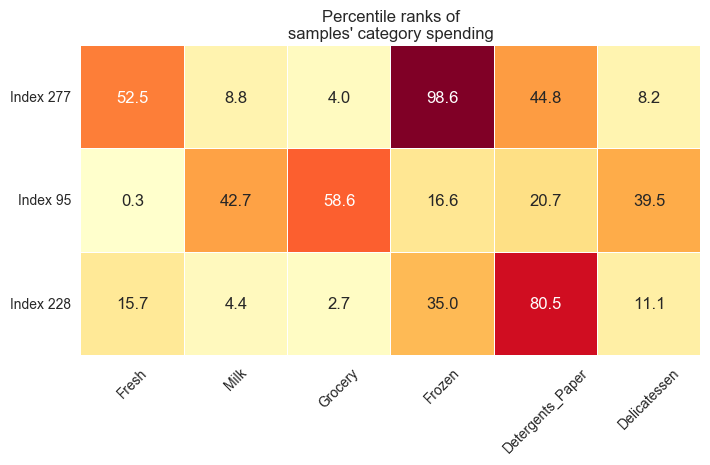

In [10]:
# plot chosen samples in a heatmap of their percentile ranks,
# as suggested by reviewer

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
#pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
rank = data.rank(axis=0, pct=True)
#print rank
pcts = 100. * rank.iloc[indices] #.round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

In [11]:
# this shows that customer 277 is at the very high end of spending on Frozen goods,
# and customer 95 is at the very low end of spending on Fresh goods, etc.

### &#x1F534; Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 

Sample 0 could be for an **ice-cream shop**, since its Frozen amount is well above average (2.8 stdevs) and the other amounts are below average.

Sample 1 could be for a **small gas station**, as it has practically no Fresh items and other items are below average.

Sample 2 is above average for Detergents/Paper and below average for everything else, so could be some kind of **cleaning service**.

**reviewer notes**: using the median would probably be more appropriate rather than mean, since the median/quartiles are more robust to outliers, which we have here. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# try dropping this feature
feature = 'Detergents_Paper'

print 'trying to predict',feature

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(feature, axis=1) # axis=1 for columns

ntrials = 10
total = 0
for seed in range(ntrials):
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], random_state=seed)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=seed)
    regressor.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print 'seed',seed,'score',score
    total += score
print 'average score', total/ntrials

trying to predict Detergents_Paper
seed 0 score 0.728655181254
seed 1 score 0.81531524187
seed 2 score 0.5370246003
seed 3 score 0.563935330016
seed 4 score 0.710798094832
seed 5 score 0.672580919764
seed 6 score 0.536120708992
seed 7 score 0.695256147197
seed 8 score 0.600340183733
seed 9 score 0.635948456343
average score 0.64959748643


### &#x1F534; Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I tried to predict the **Detergents_Paper** feature, since it looked (below) like it was correlated with Grocery - the prediction only had an average R^2 score of 0.65 though, so it looks like it's still pretty important for identifying customers' spending habits. If it had an R^2 score closer to 1 though, it could be dropped without losing too much accuracy. 

**reviewer notes:** 

I might have to say that the score of 0.65 is pretty high, as this can probably be derived from the other features.

Code Note: Great idea to try out multiple random data splits, as this is essentially cross-validation. Could also try and use

    from sklearn.cross_validation import cross_val_score
    print cross_val_score(regressor, X_train, y_train, cv = 10)



### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

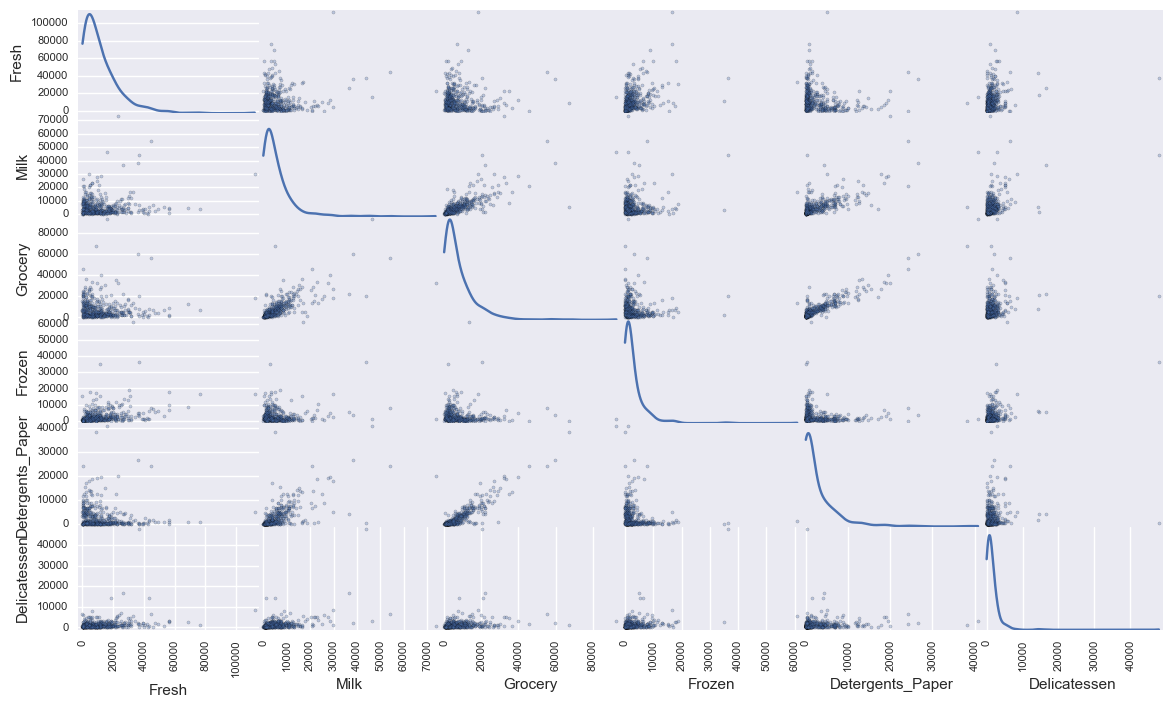

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

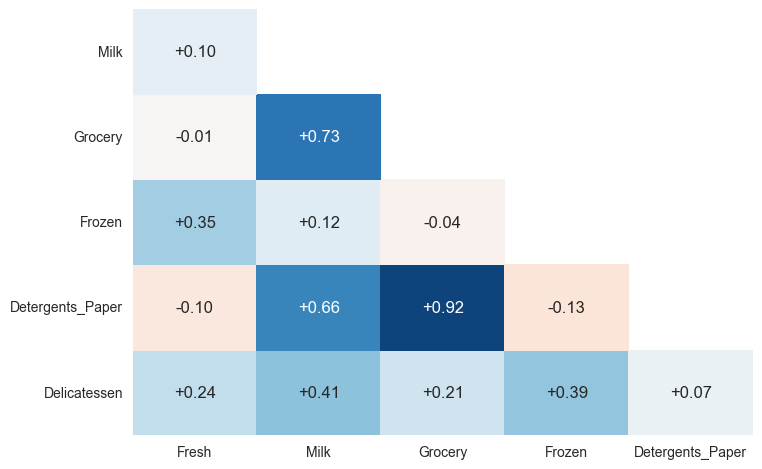

In [14]:
# for a closer look at the correlations we can also use data.corr(),
# as suggested by reviewer

# get the feature correlations
corr = data.corr()

# remove first row and last column for a cleaner look
corr.drop(['Fresh'], axis=0, inplace=True)
corr.drop(['Delicatessen'], axis=1, inplace=True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)


In [15]:
# so this shows that Grocery and Detergents/Paper are very highly correlated

### &#x1F534; Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

**Grocery and Detergents_Paper** seem to be correlated, as do **Grocery and Milk**, and **Milk and Detergents_Paper**.

This confirms the idea that Detergents_Paper could possibly be dropped, since some of that information is captured in the Grocery and Milk features. 

Most of the values for these features are distributed near 0 - they look like very skewed normal distributions. 

In [16]:
# show the cross-correlation matrix
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [17]:
# show the correlation matrix visually
def plotCorrelationMatrix(df):
    "plot correlation matrix of a pandas dataframe to a grid"
    # adapted from http://nbviewer.jupyter.org/gist/joelotz/5427209
    corr = df.corr() # get correlation matrix
    names = corr.columns
    plt.figure(figsize=(3,3))
    ax = plt.axes()
    ax.set_yticks(np.arange(corr.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(corr.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top() 
    ax.set_xticklabels(names,minor=False)
    ax.set_yticklabels(names,minor=False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    plt.xticks(rotation=90)
    ax.grid(False)
    plt.pcolor(corr,cmap=mpl.cm.Greys);

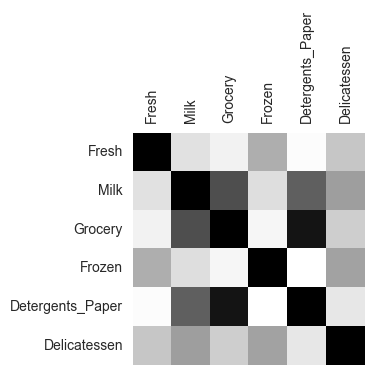

In [18]:
plotCorrelationMatrix(data)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

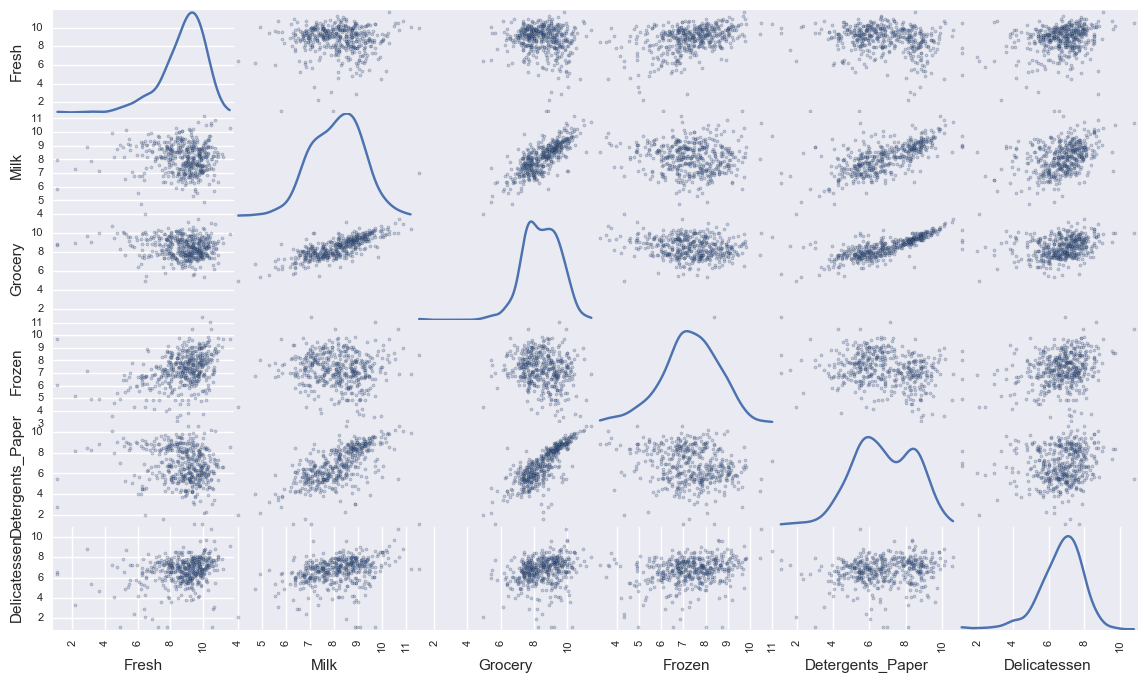

In [19]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [20]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.111735,6.720220,6.526495,9.736193,6.431331,4.934474
1,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
2,7.533159,6.357842,6.349139,6.856462,8.468423,5.313206


In [21]:
# compare the correlation matrices before and after the log scaling

In [22]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [23]:
log_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


In [24]:
# so the strongest correlation pair value went from 0.92 to 0.79 - the others didn't change so much

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [25]:
# For each feature find the data points with extreme high or low values
boundaries = {}
features = log_data.keys() # feature names
from collections import defaultdict
outlier_counts = defaultdict(lambda: 0)
for feature in features:
    
    values = log_data[feature]
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(values,25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(values,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)

    # get indices of outliers
    value_min = Q1 - step
    value_max = Q3 + step
    ioutliers = (values < value_min) | (values > value_max)

    # get outliers
    outliers = log_data[ioutliers]
    
    # save to dictionary
    boundaries[feature] = (value_min,value_max)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(outliers)    

    # add outliers to count dictionary
    for i in outliers.index.values:
        outlier_counts[i] += 1

In [26]:
# get records that are outliers in more than one feature
iremove = [k for k,v in outlier_counts.items() if v>1]
iremove

[128, 154, 65, 66, 75]

In [27]:
# plot histograms with outlier boundaries
def plotHistograms(df,features,boundaries):
    nbins = 20
    plt.figure(figsize=(12,6))
    for i,feature in enumerate(features):
        plt.subplot(2,3,i+1)
        plt.hist(df[feature], nbins)
        plt.xlabel(feature)
        xmin,xmax = boundaries[feature]
        plt.axvline(x=xmin,c='r',lw=1)
        plt.axvline(x=xmax,c='r',lw=1)
    plt.tight_layout()
    plt.show()

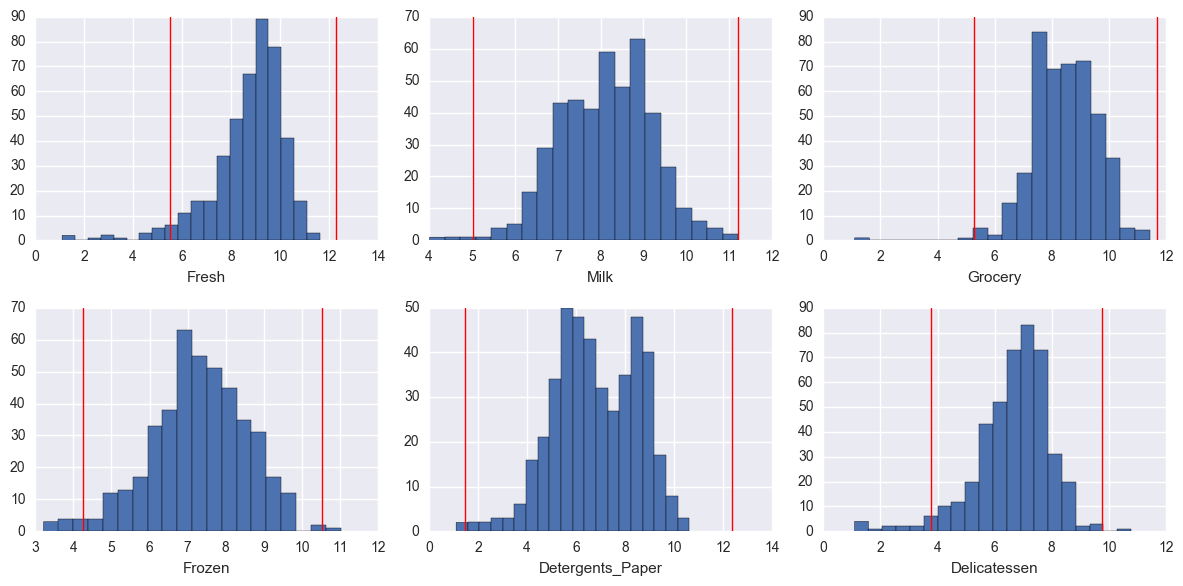

In [28]:
plotHistograms(log_data, features, boundaries)

In [29]:
# OPTIONAL: Select the indices for data points you wish to remove
iremove  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[iremove]).reset_index(drop = True)

### &#x1F534; Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are several data points that could be considered as outliers for more than one feature - [128, 154, 65, 66, 75]. 

An outlier is something you should remove if it's an obvious error, or if it throws your data analysis off in some way though - so first I'll try the analysis without removing any outliers, as they could be larger or smaller customers that might be important. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

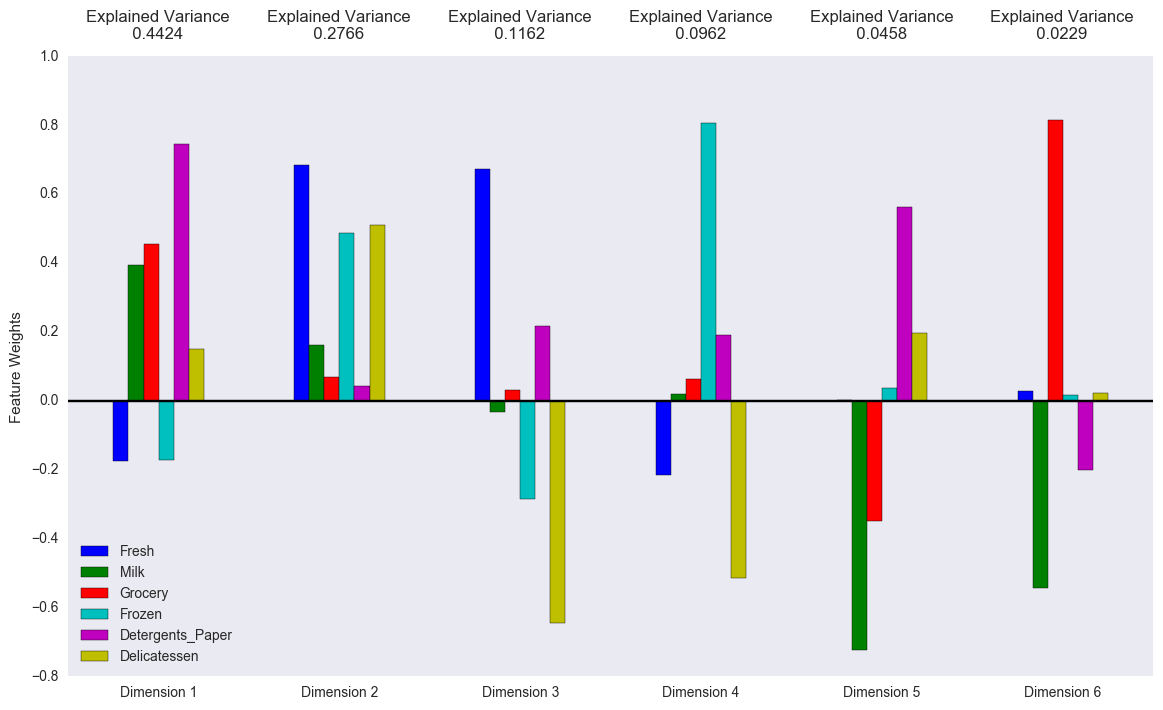

In [30]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
plt.grid()
plt.axhline(0,c='black');

### &#x1F534; Question 5

a. How much variance in the data is explained* ***in total*** *by the first and second principal component? 

b. What about the first four principal components? 

c. Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [31]:
# get sum of first two and first four principal component amounts
sum(pca.explained_variance_ratio_[0:2]), sum(pca.explained_variance_ratio_[0:4])

(0.71894523173707259, 0.93129584505477803)

**Answer:**

a. The first and second principal components explain **71.9%** of the total variance in the data. 

b. The first four principal components explain **93.1%** of the total variance. 

c. The first four dimensions each represent a major type of spending pattern:

The **first dimension** has large positive weights in Milk, Grocery, and Detergents/Paper, and negative weights in Fresh and Frozen. This might represent items that are purchased together by a grocery store. 

The **second dimension** has large positive weights in Fresh, Frozen, and Delicatessen, so this might represent the purchasing patterns of a restaurant. 

The **third dimension** has a large positive weight in Fresh, and large negatives in Frozen and Deli - this might represent the purchasing patterns of another class of restaurant, for instance, a small cafe. 

The **fourth dimension** has very high weight in Frozen, and negative weights in Fresh and Deli - this might represent the purchasing patterns of an ice cream shop. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [32]:
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.4310,0.1913,0.5862,2.5528,1.2286,-0.7117
1,0.5721,-5.9329,-5.0156,0.4633,-0.8491,0.3529
2,-0.3092,-2.0874,0.5499,0.7443,2.6687,-1.1595


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [33]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data) # good_data is log_data without the outliers

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [34]:
# show sample log-data after applying PCA transformation in two dimensions
pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])

,Dimension 1,Dimension 2
0,-2.4310,0.1913
1,0.5721,-5.9329
2,-0.3092,-2.0874


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

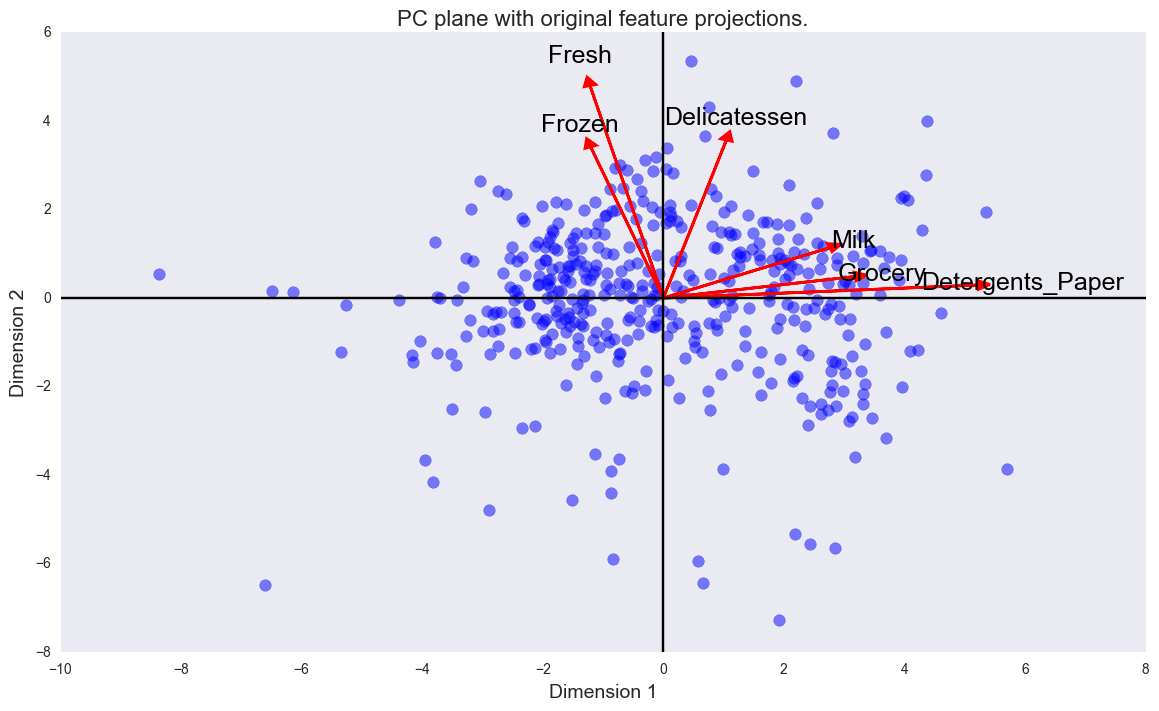

In [35]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)
plt.grid()
plt.axhline(0,c='k')
plt.axvline(0,c='k');

In [36]:
# q. what exactly does this mean?
# maybe Milk/Grocery/Detergents_Paper represent grocery stores,
# while Fresh/Frozen represent restaurants.

# customers to the right could represent grocery stores, 
# with those to the lower right being smaller convenience stores that don't carry fresh items.
# customers towards the top could represent restaurants,
# and customers to the left and bottom could represent smaller establishments
# who are potentially less important to the company's business.

# so you have two axes - dimension 1 represents 'grocery store'-ness,
# and dimension 2 represents 'restaurant'-ness.

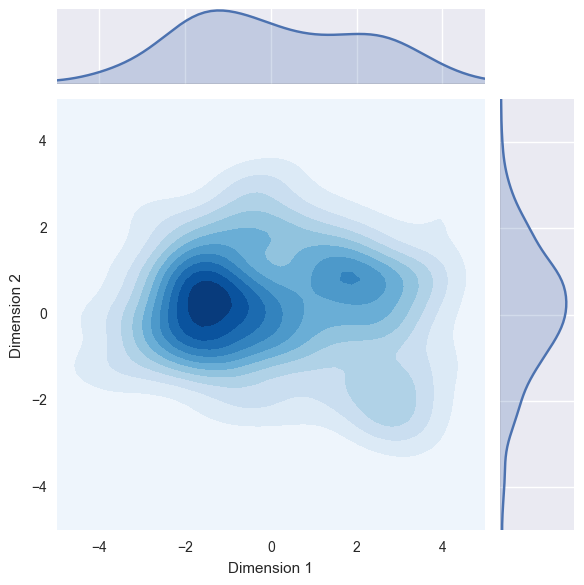

In [37]:
# plot a joint grid of the kernel densities, 
# per reviewer suggestion

import seaborn as sns
g = sns.JointGrid("Dimension 1","Dimension 2",reduced_data,xlim=(-5,5),ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

In [38]:
# from this you can see there might be 2 or 3 distinct categories of customer

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

In [39]:
# detergents_paper is most strongly correlated with the first component.
# fresh is most strongly correlated with the second component

# these observations do agree with the bar charts obtained earlier - 
# the largest component of the first dimension is detergents_paper,
# and the largest component of the second dimension is fresh.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### &#x1F534; Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means** clustering is a simple algorithm that is fast to run, but just gives a hard answer for which cluster a point belongs to, and is not able to handle overlapping clusters. It can also get stuck in local minima, so needs to be run several times with different initial center-points to try to find a more global minimum. 

The **Gaussian Mixture Model** algorithm requires more calculations, since each point can be partially in all clusters, so is slower but is able to handle overlapping clusters. It can also handle ellipsoidal cluster distributions better than K-Means, which is biased towards spherical clusters. 

I'll try the **Gaussian Mixture Model** for clustering, because it doesn't look like the data has distinct clusters - if there are some they are probably overlapping, so will need to use GMM. Also, the dataset is relatively small, so shouldn't take too long to run, and it will give more information for each customer as to which customer types it may be described by. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [40]:
#from sklearn.mixture import GaussianMixture # v0.18
from sklearn.mixture import GMM
from sklearn.cluster import KMeans

for n_components in [2,3,4,5]:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    #clusterer = KMeans(n_clusters=n_components)
    clusterer = GMM(n_components=n_components)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    #print dir(clusterer)
    # TODO: Find the cluster centers
    #centers = clusterer.cluster_centers_ # for kmeans
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn import metrics
    score = metrics.silhouette_score(reduced_data, preds)
    print 'ncomponents',n_components,'- silhouette score',score

ncomponents 2 - silhouette score 0.316017379116
ncomponents 3 - silhouette score 0.375222595239
ncomponents 4 - silhouette score 0.339343730549
ncomponents 5 - silhouette score 0.257867358339


### &#x1F534; Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

See output above - the best mean silhouette score is achieved with **3 clusters**, with a value of 0.372. This indicates the greatest amount of separation between the clusters - for 2 clusters, and as the number of clusters increases past 3, the silhouette score goes down, as the distance between the clusters decreases. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [41]:
# get the 3-component GMM again
clusterer = GMM(n_components=3, random_state=0)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

In [42]:
# note: the clusterer.predict() fn call above for GMM gives the *most-likely*
# cluster to which each data point might belong, since GMM gives you the degree
# that each point belongs to each cluster.

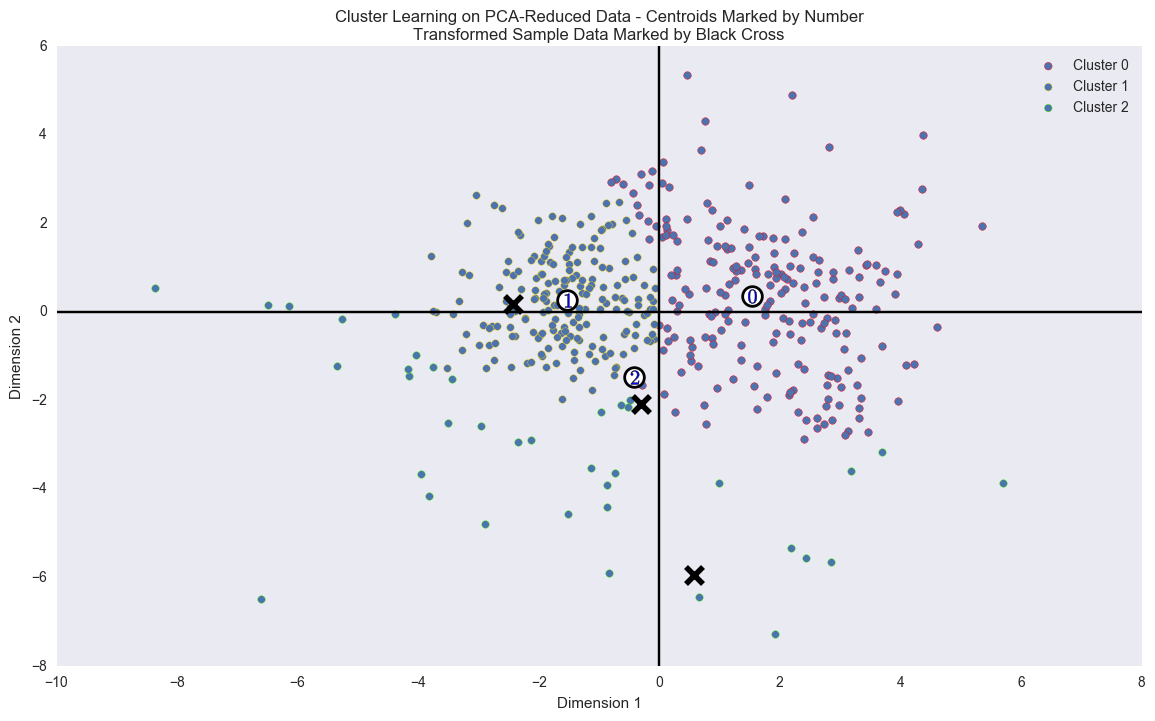

In [43]:
# reload the external python file in case made changes (like to the color map used)
reload(vs)
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)
plt.grid()
plt.axhline(0,c='k')
plt.axvline(0,c='k');

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [44]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6055,6542,9557,1354,2830,1185
Segment 1,9806,1925,2355,2216,286,721
Segment 2,2432,2244,3455,778,608,348


In [46]:
# show the statistics for the entire dataset again, or at least the mean
data.describe().loc[['mean']]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


### &#x1F534; Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Referencing the list of mean values, above, 

**Segment 0** is above average in Milk and Groceries, average in Detergents/Paper, but below average in Fresh, Frozen, and Deli, so it might represent **grocery stores**. 

**Segment 1** is below average on every category, though not as low on Fresh and Frozen items, so might represent **restaurants**, which use a lot of fresh and frozen ingredients.

**Segment 2** is below average on every category, though spends the most on Groceries, so could represent smaller customers, like **gas stations**.

### &#x1F534; Question 9

a. For each sample point, which customer segment from* ***Question 8*** *best represents it?

b. Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to belong to

In [52]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 0


(From Question 1: 
Sample 0 could be for an ice-cream shop, since its Frozen amount is well above average (2.8 stdevs) and the other amounts are below average.
Sample 1 could be for a small gas station, as it has practically no Fresh items and other items are below average.
Sample 2 is above average for Detergents/Paper and below average for everything else, so could be some kind of cleaning service)

**Answer:** 

a. For **Sample 0**, the values for Frozen are well above average - this mirrors the category spending for the Segment 1 center (which is higher in Fresh and Frozen than the other categories), so the predicted cluster seems to be consistent with the sample.

For **Sample 1**, the values are highest in Milk and Groceries, which mirrors the category spending for the Segment 0 center. This is different from the predicted cluster of 2.

For **Sample 2**, the values are highest in Detergents/Paper, which mirrors the category spending for the Segment 0 center, so the predicted cluster seems to be consistent with the sample.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### &#x1F534; Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Once you have the customers divided up into segments, you could try a change for a random sample of customers from each segment and see how they respond. Depending on their response, you might predict that other customers in the same segment will respond in the same way. 

Alternately, you could try the change for a random sample of customers and based on their responses use supervised learning to try to predict the responses of all other customers. 

### &#x1F534; Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. 

Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  

*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

You could use the **customer segment** as the target variable for a superviser learner, e.g. k-nearest neighbors - then, given the projected spending for each product category you could predict which **customer segment** the new customer would belong to. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

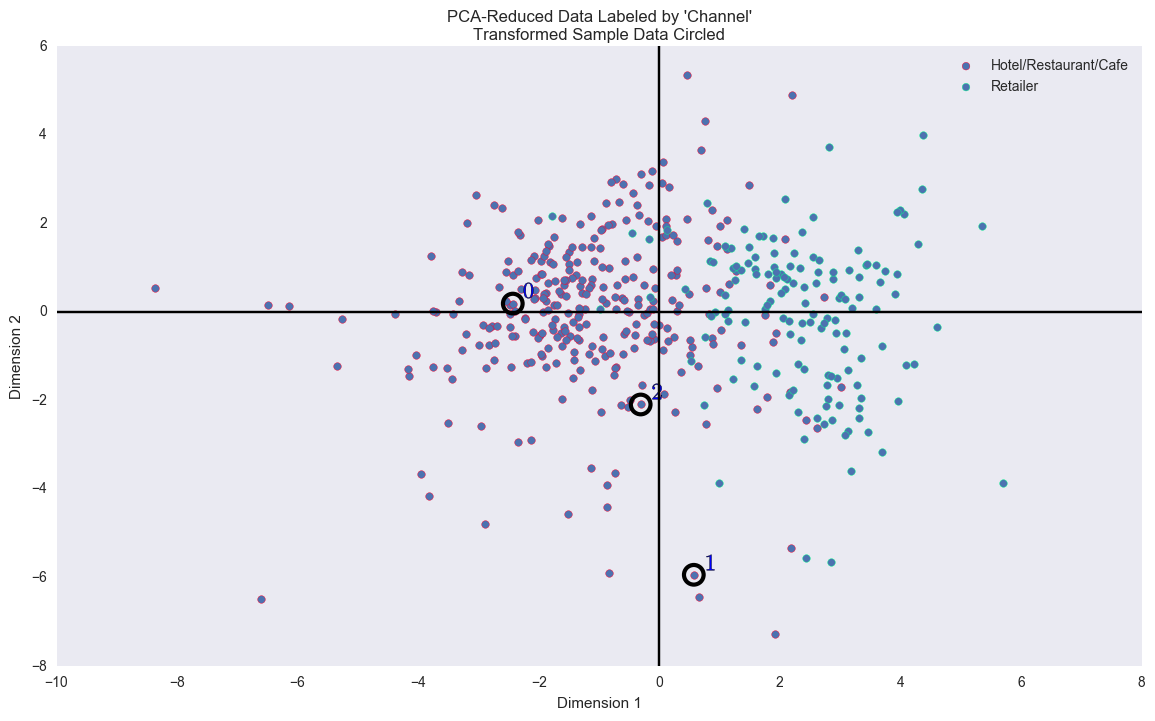

In [49]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, iremove, pca_samples)
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k');

### &#x1F534; Question 12
1. How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 

2. Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 

3. Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

1. The silhouette score guided us to choose 3 clusters, while the original data was split into 2 segments. The division that k-means found is fairly close to that between Retail and Hotels/Restaurants/Cafes, though the bottom third was split into a new cluster, which included customers who spent less on one of the axes - Fresh/Frozen or Grocery/Milk/Paper. 

2. Cluster 1 could pretty much be classified as purely Hotel/Restaurant/Cafes, and Cluster 0 is nearly all Retailers. 

3. I'd thought that Cluster 0 might represent grocery stores, so it fits the actual distribution of Retailers. And I'd thought Cluster 1 might represent restaurants, which fits with the actual distribution of Hotel/Restaurant/Cafes. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Appendix

Compare time for KMeans vs GMM - inspired by code from https://discussions.udacity.com/t/k-means-vs-gmm-speed/161658/4

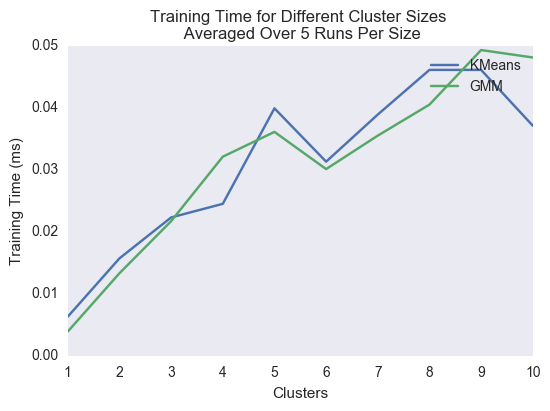

In [50]:
import time

n = 5
kmax = 10
seed = 0
clusterers = [KMeans, GMM]

ks = range(1,kmax+1)
for clusterer in clusterers:
    times = []
    for k in ks:
        start = time.time()
        for i in range(n):
            clusterer(k, random_state=seed).fit(reduced_data)
        train_time = (time.time() - start) / n
        times.append(train_time)
    plt.plot(ks, times, label=clusterer.__name__)
    
plt.xlabel('Clusters')
plt.ylabel('Training Time (ms)')
plt.title('Training Time for Different Cluster Sizes \n Averaged Over %i Runs Per Size' % n)
plt.grid()
plt.legend()
plt.show();

The results can be a bit mixed, but generally GMM takes longer than KMeans, though not as much as expected - but this is a fairly small dataset.